In [1]:
%pylab inline
import pynbody
import scipy.stats as sp

Populating the interactive namespace from numpy and matplotlib


Tengo un delta de corte de Kitayama 1996 segun esta relacion 

In [2]:
def delta(z,om,ol):
    f=(om*(1+z)**3)/((om*(1+z)**3)+ol)
    d=6*(np.pi**2) * (1.+0.4093*(((1./f) - 1.)**(0.9052)))-1
    
    d2=((3*(12*np.pi)**(2./3.))/20.)*(1.+0.123*np.log10(f))
    
    return d

In [3]:
delta(0,.276,.724)

116.24289900995882

In [38]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s0_s=pynbody.load(path+'snapshot_050')
a=s0_s.properties['a']
redshift=1./a -1

In [39]:
gas0_s=s0_s.gas
pos0_s=gas0_s['pos']
ne0_s=gas0_s['ne']
u0_s=gas0_s['u']
rho0_s=gas0_s['rho']

In [5]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 
xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250

r0_s=np.sqrt((pos0_s[:,0]-xc)**2+(pos0_s[:,1]-yc)**2+(pos0_s[:,2]-zc)**2)

rv_s=8
cutv0_s, = np.where(r0_s<rv_s)

In [6]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu0_s=(1.0-yHe)/(1+yHe+ne0_s)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te0_s=(5./3.-1.)*u0_s*vv*mu0_s*mp/kcgs
dgsv_s=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)*.4  #el 0.4 es porque tengo un 40% de la densidad del universo en esa region (la densidad integrada es 0.6) 
                                                      # cuando se lo mostre a dante lo habia hecho con 0.1
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)

Text(0.5, 1.0, 'Into The Void')

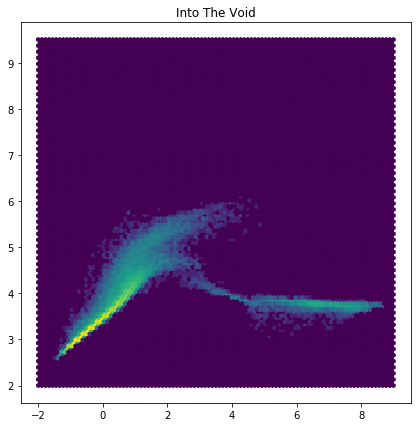

In [7]:
plt.figure(figsize=(7,7))
plt.hexbin(np.log10(rho0_s[cutv0_s]/dgs),np.log10(te0_s[cutv0_s]),bins='log',extent=(-2,9,2,9.5))
plt.title('Into The Void')

Aca voy a obtener los porcentajes en el void

In [19]:
difu_vs, = np.where((te0_s[cutv0_s] < 10**5)  & (rho0_s[cutv0_s] < delta(redshift,0.276,0.724)))
whim_vs, = np.where((te0_s[cutv0_s] >= 10**5) & (rho0_s[cutv0_s] < delta(redshift,0.276,0.724)))
hot_vs,  = np.where((te0_s[cutv0_s] >= 10**5) & (rho0_s[cutv0_s] >= delta(redshift,0.276,0.724)))
cond_vs, = np.where((te0_s[cutv0_s] < 10**5)  & (rho0_s[cutv0_s] >= delta(redshift,0.276,0.724)))
tot_vs=len(difu_vs) + len(whim_vs) + len(hot_vs) + len(cond_vs)
dp_vs=len(difu_vs)/tot_vs
wp_vs=len(whim_vs)/tot_vs
hp_vs=len(hot_vs)/tot_vs
cp_vs=len(cond_vs)/tot_vs
print('difusa',dp_vs)
print('whim',wp_vs)
print('hot',hp_vs)
print('condensada',cp_vs)

difusa 0.8685060226987104
whim 0.022950058970244196
hot 0.016840354981535546
condensada 0.09170356334950987


Aca voy a hacer lo mismo con el void R, OJO QUE REESCRIBO TODAS LAS VARIABLES !!! )  (

puede no correrse y anda todo)

difusa 0.8167790473022251
whim 0.05384034699387131
hot 0.03335593740803767
condensada 0.09602466829586602


Text(0.5, 1.0, 'Into The Void')

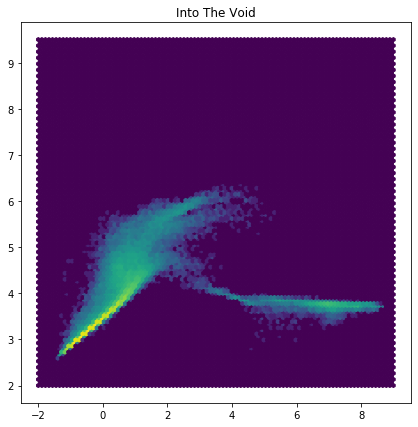

In [12]:
path='/mnt/is2/dpaz/ITV/R1198/out/'
s0_r=pynbody.load(path+'snapshot_050')
a=s0_r.properties['a']
redshift=1./a -1
gas0_r=s0_r.gas
pos0_r=gas0_r['pos']
ne0_r=gas0_r['ne']
u0_r=gas0_r['u']
rho0_r=gas0_r['rho']
xbox=411.2170 
ybox=162.1655
zbox=453.0553
xc=413.621475 -xbox+250
yc= 162.604601   -ybox+250
zc=448.953638-zbox+250
r0_r=np.sqrt((pos0_r[:,0]-xc)**2+(pos0_r[:,1]-yc)**2+(pos0_r[:,2]-zc)**2)

rv_r=8.8
cutv0_r, = np.where(r0_r<rv_r)
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu0_r=(1.0-yHe)/(1+yHe+ne0_r)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te0_r=(5./3.-1.)*u0_r*vv*mu0_r*mp/kcgs
dgsv_r=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)*.4  #el 0.4 es porque tengo un 40% de la densidad del universo en esa region (la densidad integrada es 0.6) 
                                                      # cuando se lo mostre a dante lo habia hecho con 0.1
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)
difu_vr, = np.where((te0_r[cutv0_r] < 10**5)  & (rho0_r[cutv0_r] < delta(redshift,0.276,0.724)))
whim_vr, = np.where((te0_r[cutv0_r] >= 10**5) & (rho0_r[cutv0_r] < delta(redshift,0.276,0.724)))
hot_vr,  = np.where((te0_r[cutv0_r] >= 10**5) & (rho0_r[cutv0_r] >= delta(redshift,0.276,0.724)))
cond_vr, = np.where((te0_r[cutv0_r] < 10**5)  & (rho0_r[cutv0_r] >= delta(redshift,0.276,0.724)))

tot_vr=len(difu_vr) + len(whim_vr) + len(hot_vr) + len(cond_vr)
dp_vr=len(difu_vr)/tot_vr
wp_vr=len(whim_vr)/tot_vr
hp_vr=len(hot_vr)/tot_vr
cp_vr=len(cond_vr)/tot_vr
print('difusa',dp_vr)
print('whim',wp_vr)
print('hot',hp_vr)
print('condensada',cp_vr)

plt.figure(figsize=(7,7))
plt.hexbin(np.log10(rho0_r[cutv0_r]/dgs),np.log10(te0_r[cutv0_r]),bins='log',extent=(-2,9,2,9.5))
plt.title('Into The Void')

Ahora paso a analizar el box cosmologico

In [14]:
error=[]; z=[]; difu=[]; cond=[]; hot=[]; whim=[]; star=[]
for i in range(20,51):
    x=str(i)
    print(i)
    #path='/mnt/is0/fstasys/512_b/out/'
    #s=pynbody.load(path+'snapdir_0'+x+'/'+'snapshot_0'+x+'.0')
    path='/mnt/is0/fstasys/512_b/512_mass/out/'
    s=pynbody.load(path+'snapshot_0'+x)
    a=s.properties['a']
    om=s.properties['omegaM0']
    ol=s.properties['omegaL0']

    redshift=1./a -1
       
    gas=s.gas
    pos=gas['pos']
    u=gas['u']
    ne=gas['ne']
    rho=gas['rho']
       
    mu=(1.0-yHe)/(1+yHe+ne)
    te=(5./3.-1.)*u*vv*mu*(mp/kcgs)#*(a**2)
   
    difu_, = np.where((te < 10**5)  & (rho < delta(redshift,om,ol)))
    whim_, = np.where((te >= 10**5) & (rho < delta(redshift,om,ol)))
    hot_,  = np.where((te >= 10**5) & (rho >= delta(redshift,om,ol)))
    cond_, = np.where((te < 10**5)  & (rho >= delta(redshift,om,ol)))

    difu.append(len(difu_))
    whim.append(len(whim_))
    hot.append(len(hot_))
    cond.append(len(cond_))
    z.append(redshift)
    star.append(len(s.star))

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


OSError: File '/mnt/is0/fstasys/512_b/512_mass/out/snapshot_048': format not understood or does not exist

Entonces ahora tengo en las listas difu,whim hot, cond la cantidad de particulas que pertenecen a cada fase. Ahora quiero contruir los porcentajes que representan del total. 

In [20]:
error_s=[]
error_r=[]
for i in range(len(difu)):
    d=difu[i]
    h=hot[i]
    w=whim[i]
    c=cond[i]
    tot=d+h+w+c
    dp=d/tot
    hp=h/tot
    wp=w/tot
    cp=c/tot
    es = (dp - dp_vs )**2 + (hp-hp_vs)**2 + (wp-wp_vs)**2 + (cp-cp_vs)**2
    error_s.append(es)
    er = (dp - dp_vr )**2 + (hp-hp_vr)**2 + (wp-wp_vr)**2 + (cp-cp_vr)**2
    error_r.append(er)

[]

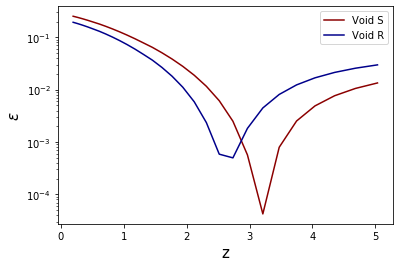

In [26]:
plt.plot(z,error_s,color='darkred',label='Void S')
plt.plot(z,error_r,color='darkblue',label='Void R')
plt.legend()
plt.ylabel('$\epsilon$',size=15)
plt.xlabel('z',size=15)
plt.semilogy()
#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/TimeMachine_error.png',format='png')

In [27]:
total=difu[6]+cond[6]+hot[6]+whim[6]
print('universo:',difu[6]/total)
print('universo:',cond[6]/total)
print('universo:',whim[6]/total)
print('universo:',hot[6]/total)

universo: 0.8717920750299768
universo: 0.09399336663918494
universo: 0.022489450294573037
universo: 0.011725108036265239


In [29]:
path='/mnt/is0/fstasys/512_b/out/snapdir_027/'
s1=pynbody.load(path+'snapshot_027')
a=s1.properties['a']
redshift=1./a -1
om=s1.properties['omegaM0']
ol=s1.properties['omegaL0']
   
gas1=s1.gas
pos1=gas1['pos']
u1=gas1['u']
ne1=gas1['ne']
rho1=gas1['rho']

In [30]:
redshift

2.9671059266191917

In [31]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu1=(1.0-yHe)/(1+yHe+ne1)
te1=(5./3.-1.)*u1*vv*mu1*mp/kcgs

In [32]:
cut=np.arange(0,len(u1),1000)

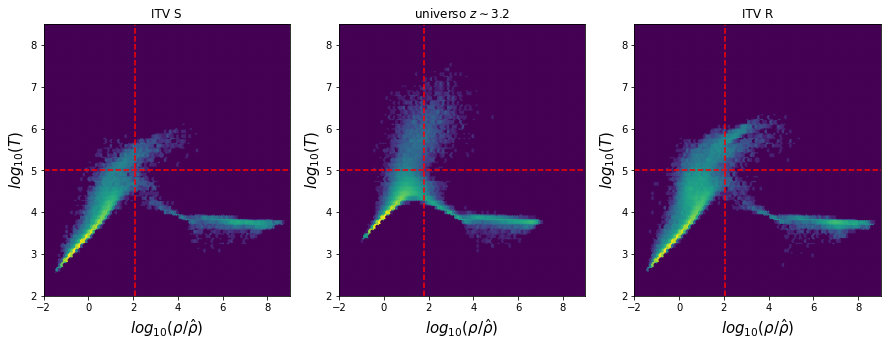

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hexbin(np.log10(rho0_s[cutv0_s]/dgs),np.log10(te0_s[cutv0_s]),bins='log',extent=(-2,9,2,8.5))
plt.title('ITV S')
plt.xlabel('$log_{10}(\\rho / \hat{\\rho})$',size=15)
plt.ylabel('$log_{10}(T)$',size=15)
plt.vlines(x=np.log10(delta(0,0.276,0.724)+1),ymin=2,ymax=8.5,color='red',ls='--')
plt.hlines(y=5,xmin=-2,xmax=9,color='red',ls='--')

plt.subplot(132)
plt.hexbin(np.log10(rho1[cut]/dgs),np.log10(te1[cut]),bins='log',extent=(-2,9,2,8.5))
plt.title('universo $z \sim 3.2$')
plt.xlabel('$log_{10}(\\rho / \hat{\\rho})$',size=15)
plt.ylabel('$log_{10}(T)$',size=15)
plt.vlines(x=np.log10(delta(redshift,om,ol)+1),ymin=2,ymax=8.5,color='red',ls='--')
plt.hlines(y=5,xmin=-2,xmax=9,color='red',ls='--')


plt.subplot(133)
plt.hexbin(np.log10(rho0_r[cutv0_r]/dgs),np.log10(te0_r[cutv0_r]),bins='log',extent=(-2,9,2,8.5))
plt.title('ITV R')
plt.xlabel('$log_{10}(\\rho / \hat{\\rho})$',size=15)
plt.ylabel('$log_{10}(T)$',size=15)
plt.vlines(x=np.log10(delta(0,0.276,0.724)+1),ymin=2,ymax=8.5,color='red',ls='--')
plt.hlines(y=5,xmin=-2,xmax=9,color='red',ls='--')

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/TimeMachine_DF.png',format='png')

In [11]:
print('Universo',h1[0])

print('ITV',h0[0])

Universo [[0.02945807 0.00214132]
 [0.00357771 0.00053719]]
ITV [[0.0294967  0.00136622]
 [0.00382994 0.00102143]]


Voy a chequear ahora las funciones de masa de los halos aprovechando que tengo identificados en el snapshot de la base vieja los halos

In [53]:
h0=np.loadtxt('/mnt/is0/fstasys/512_b/halos/snap_25/halos_25.0.ascii',skiprows=20)
h1=np.loadtxt('/mnt/is0/fstasys/512_b/halos/snap_25/halos_25.1.ascii',skiprows=20)
h2=np.loadtxt('/mnt/is0/fstasys/512_b/halos/snap_25/halos_25.2.ascii',skiprows=20)
h3=np.loadtxt('/mnt/is0/fstasys/512_b/halos/snap_25/halos_25.3.ascii',skiprows=20)
h4=np.loadtxt('/mnt/is0/fstasys/512_b/halos/snap_25/halos_25.4.ascii',skiprows=20)
h5=np.loadtxt('/mnt/is0/fstasys/512_b/halos/snap_25/halos_25.5.ascii',skiprows=20)
h6=np.loadtxt('/mnt/is0/fstasys/512_b/halos/snap_25/halos_25.6.ascii',skiprows=20)
h7=np.loadtxt('/mnt/is0/fstasys/512_b/halos/snap_25/halos_25.7.ascii',skiprows=20)
h=[]
h.append(h0[:,1])
h.append(h1[:,1]); h.append(h2[:,1]); h.append(h3[:,1])
h.append(h4[:,1]); h.append(h5[:,1])
h.append(h6[:,1]); h.append(h7[:,1])


In [57]:
h0[:,1]

array([  30., 1381.,   46., ...,   26.,   27.,   26.])

In [48]:
tr=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop2_R.dat')
ts=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop2_S.dat')
masa_dm=0.09328805
masa_gs=0.018172996
inr, = np.where(tr[:,0]<13)
ins, = np.where(ts[:,0]<10)
outs,= np.where((ts[:,0]<30) & (ts[:,0]>25 ))
outr,= np.where((tr[:,0]<30) & (tr[:,0]>25 ))


[]

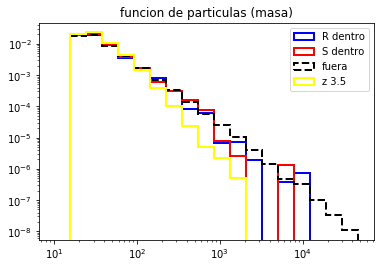

In [58]:
range=(10,np.max(tr[outr,5]))
bines=20
minimo=10
maximo=np.max(ts[outs,5])
bines=np.logspace(np.log10(minimo),np.log10(maximo), bines)
plt.title('funcion de particulas (masa)')

h3=np.append(tr[outr,5],ts[outs,5])
plt.hist(tr[inr,5],histtype='step',range=range,bins=bines,density='true',lw=2,color='blue',label='R dentro')
plt.hist(ts[ins,5],histtype='step',range=range,bins=bines,density='true',lw=2,color='red',label='S dentro')
plt.hist(h3,histtype='step',range=range,bins=bines,density='true',lw=2,color='black',ls='--',label='fuera')

plt.hist(h0[:,1],histtype='step',range=range,bins=bines,density='true',lw=2,color='yellow',label='z 3.5')


plt.legend()
plt.semilogy()
plt.semilogx()